## Image Blurring, Edge, and Sharpening by the method of 2D convolution with filtering matrix using scipy.signal.convolve2d Lib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
pwd

'/home/thura/Desktop/computer-vision-and-DL/CV-course1/6 - image filtering'

In [4]:
img = plt.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/6 - image filtering/images/bird1.jpeg')[:, :, :3]

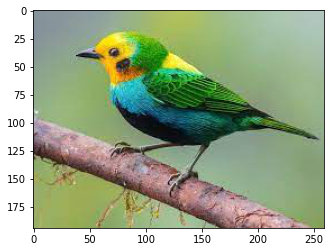

In [9]:
plt.imshow(img)

In [5]:
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

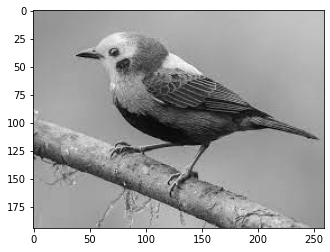

In [11]:
plt.imshow(imgGray, cmap='gray')

### Image Smooth Blurring

In [6]:
smoothMask = np.ones((15, 15))/255

In [7]:
# Blurring by Scipy Lib
imgBlurred = signal.convolve2d(imgGray, smoothMask, boundary='symm', mode='same')

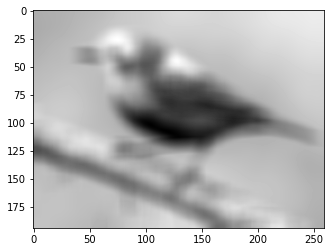

In [13]:
plt.imshow(imgBlurred, cmap='gray')

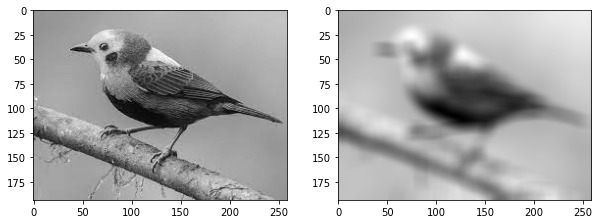

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(imgGray, cmap='gray')
ax2.imshow(imgBlurred, cmap='gray')

### Image Edges

In [22]:
xMask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # vertical
yMask = xMask.T.copy()   # horizontal

In [23]:
fx = signal.convolve2d(imgGray, xMask, boundary='symm', mode='same')
fy = signal.convolve2d(imgGray, yMask, boundary='symm', mode='same')

In [24]:
fx.shape

(194, 259)

In [25]:
imgGray.shape

(194, 259)

In [26]:
gradientMagni = np.sqrt(fx**2 + fy**2)

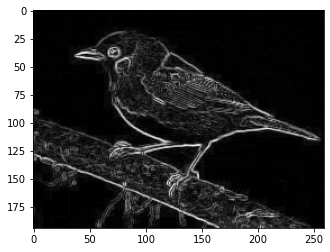

In [27]:
plt.imshow(gradientMagni, cmap='gray')

In [28]:
threshold = gradientMagni.max()-2*gradientMagni.std()
threshold

335.15636075077697

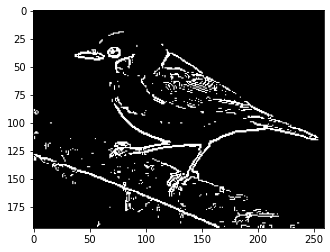

In [31]:
EdgesImg = gradientMagni > 150 # threshold
plt.imshow(EdgesImg, cmap = 'gray')

### Image Sharpening

In [36]:
imgSharped = imgBlurred + 0.5*gradientMagni

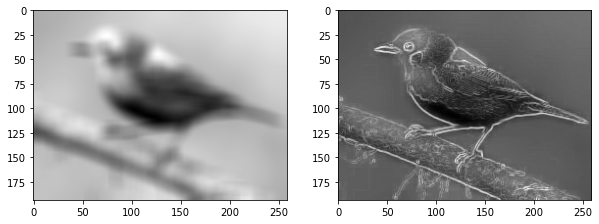

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.imshow(imgBlurred, cmap='gray')
ax2.imshow(imgSharped, cmap='gray')